### Random Forest

Dataset Overview:
Total samples: 150
Features: 4
Classes: 3

Feature Names:
- sepal length (cm)
- sepal width (cm)
- petal length (cm)
- petal width (cm)

Target Classes:
- 0: setosa
- 1: versicolor
- 2: virginica


Exploratory Data Analysis
-------------------------
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target species  
0       0  setosa  
1       0  setosa  
2       0  setosa  
3       0  setosa  
4       0  setosa  

Basic Statistics:
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         15

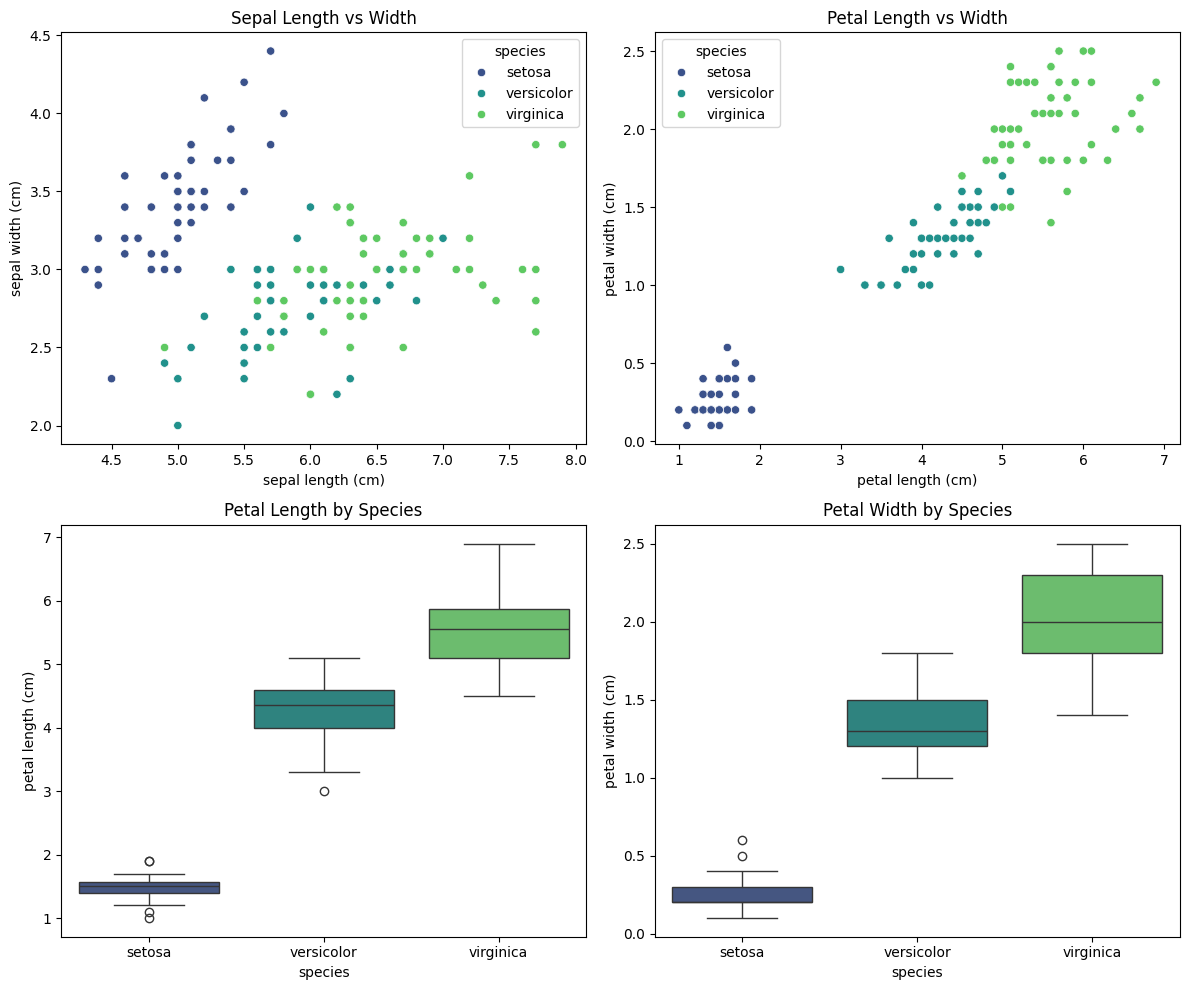



Model Building and Optimization
-----------------------------
Fitting 5 folds for each of 324 candidates, totalling 1620 fits

Best Parameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 100}
Best Cross-Validation Score: 0.9619


Model Evaluation
---------------
Accuracy: 0.9111

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.82      0.93      0.88        15
   virginica       0.92      0.80      0.86        15

    accuracy                           0.91        45
   macro avg       0.92      0.91      0.91        45
weighted avg       0.92      0.91      0.91        45



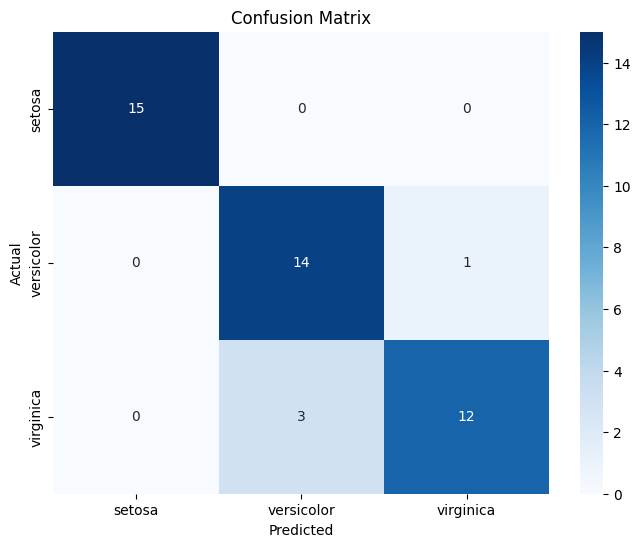

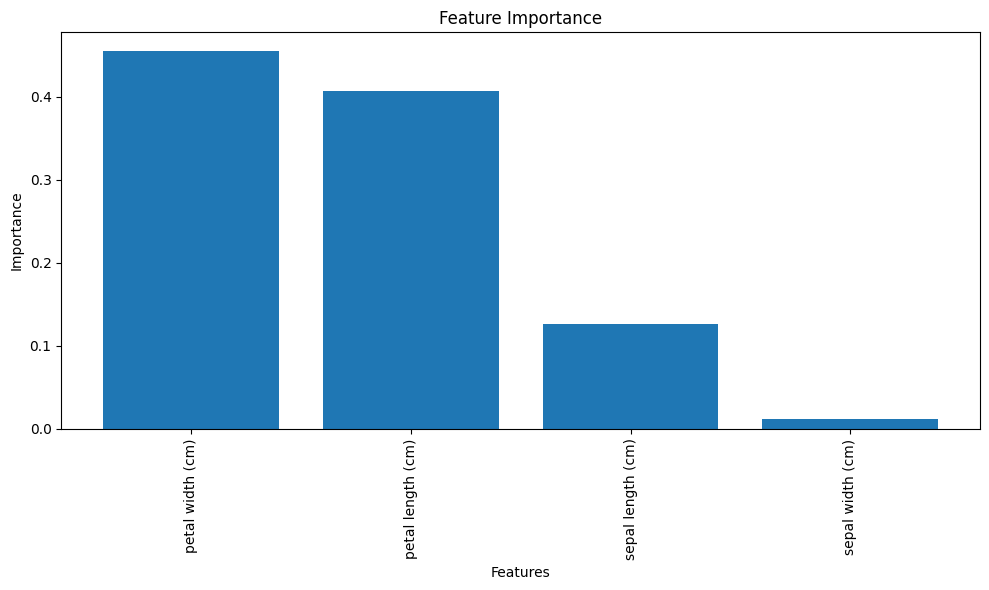

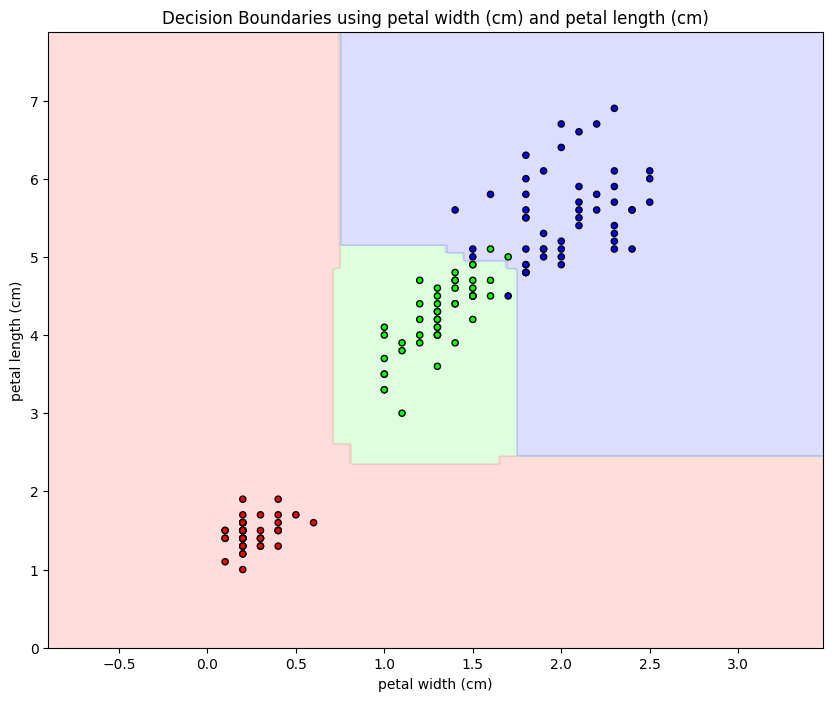

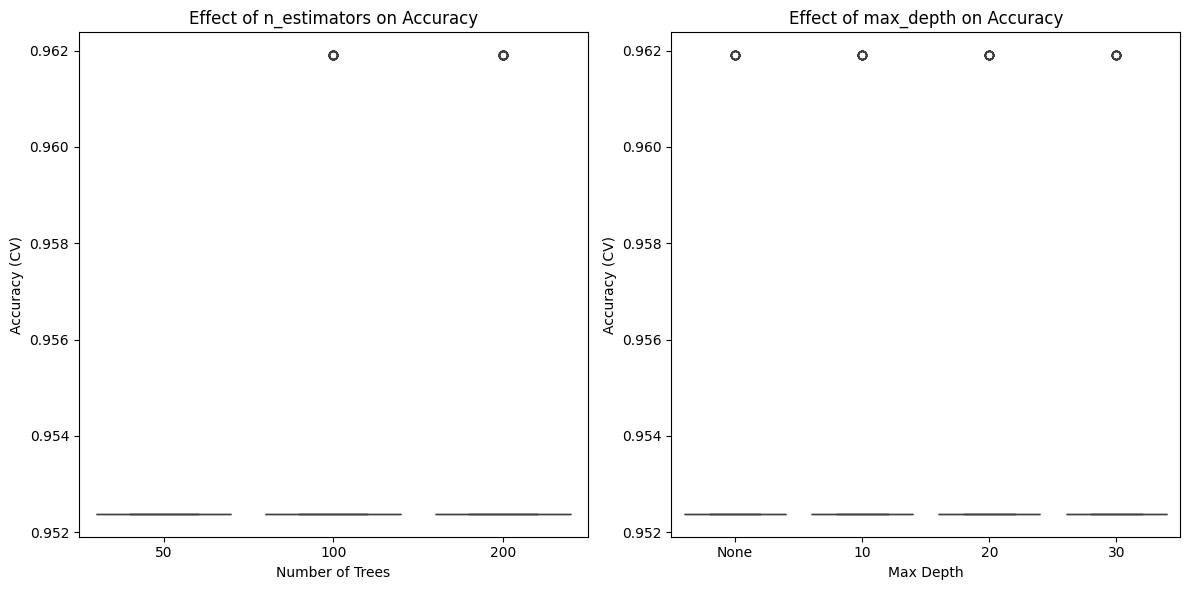



Model Prediction Visualization
---------------------------

Predicting for sample at index 102:
Actual class: virginica
Feature values: [7.1 3.  5.9 2.1]


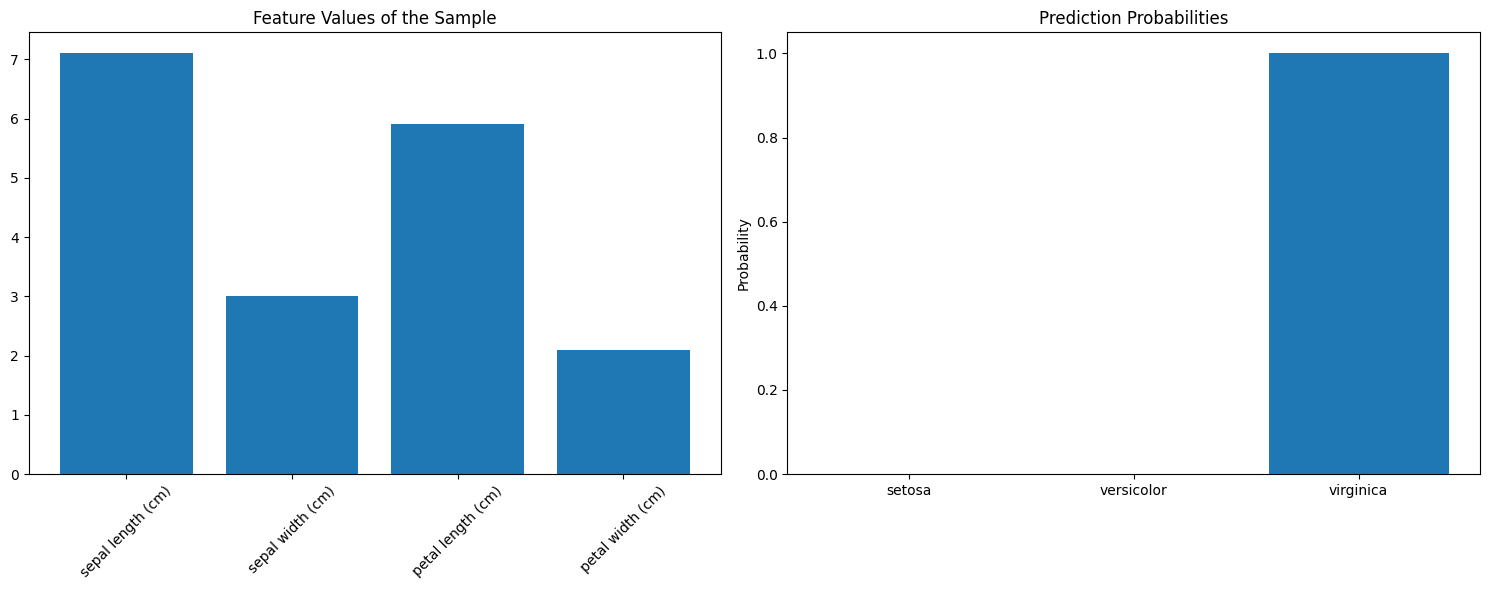

Predicted class: virginica
Prediction probabilities: [0. 0. 1.]


Summary
-------
1. Best Random Forest Model:
   - max_depth: None
   - max_features: sqrt
   - min_samples_leaf: 4
   - min_samples_split: 2
   - n_estimators: 100
2. Test Accuracy: 0.9111
3. Most Important Features:
   - petal width (cm): 0.4548
   - petal length (cm): 0.4071
   - sepal length (cm): 0.1264
4. Visualizations Generated:
   - EDA plots (iris_eda.png)
   - Confusion Matrix (confusion_matrix.png)
   - Feature Importance (feature_importance.png)
   - Decision Boundaries (decision_boundaries.png)
   - Hyperparameter Effects (hyperparameter_effects.png)
   - Sample Prediction (prediction_visualization.png)


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler
import matplotlib.cm as cm
from matplotlib.colors import ListedColormap
import warnings
warnings.filterwarnings('ignore')

# Set random seed for reproducibility
np.random.seed(42)

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names
target_names = iris.target_names

# Convert to DataFrame for easier handling
iris_df = pd.DataFrame(X, columns=feature_names)
iris_df['target'] = y
iris_df['species'] = iris_df['target'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})

print("Dataset Overview:")
print(f"Total samples: {X.shape[0]}")
print(f"Features: {X.shape[1]}")
print(f"Classes: {len(np.unique(y))}")
print("\nFeature Names:")
for name in feature_names:
    print(f"- {name}")
print("\nTarget Classes:")
for i, name in enumerate(target_names):
    print(f"- {i}: {name}")

# Exploratory Data Analysis
print("\n\nExploratory Data Analysis")
print("-------------------------")
print(iris_df.head())
print("\nBasic Statistics:")
print(iris_df.describe())

# Data Visualization
plt.figure(figsize=(12, 10))

# Create a pairplot to visualize relationships between features
plt.subplot(2, 2, 1)
sns.scatterplot(x='sepal length (cm)', y='sepal width (cm)',
                hue='species', data=iris_df, palette='viridis')
plt.title('Sepal Length vs Width')

plt.subplot(2, 2, 2)
sns.scatterplot(x='petal length (cm)', y='petal width (cm)',
                hue='species', data=iris_df, palette='viridis')
plt.title('Petal Length vs Width')

plt.subplot(2, 2, 3)
sns.boxplot(x='species', y='petal length (cm)', data=iris_df, palette='viridis')
plt.title('Petal Length by Species')

plt.subplot(2, 2, 4)
sns.boxplot(x='species', y='petal width (cm)', data=iris_df, palette='viridis')
plt.title('Petal Width by Species')

plt.tight_layout()
plt.savefig('iris_eda.png')
plt.show()

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("\n\nModel Building and Optimization")
print("-----------------------------")

# Initialize Random Forest classifier
rf = RandomForestClassifier(random_state=42)

# Define parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None]
}

# Grid search with cross-validation
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5,
    n_jobs=-1,
    scoring='accuracy',
    verbose=1
)

# Fit the grid search to the data
grid_search.fit(X_train_scaled, y_train)

# Print best parameters and score
print("\nBest Parameters:", grid_search.best_params_)
print("Best Cross-Validation Score: {:.4f}".format(grid_search.best_score_))

# Get the best model
best_rf = grid_search.best_estimator_

# Make predictions
y_pred = best_rf.predict(X_test_scaled)

# Model evaluation
print("\n\nModel Evaluation")
print("---------------")
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=target_names))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=target_names,
            yticklabels=target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.savefig('confusion_matrix.png')
plt.show()

# Feature importance
importances = best_rf.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
plt.bar(range(X.shape[1]), importances[indices], align='center')
plt.xticks(range(X.shape[1]), [feature_names[i] for i in indices], rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.tight_layout()
plt.savefig('feature_importance.png')
plt.show()

# Visualize decision boundaries (for two most important features)
# Get the two most important features
top_features_idx = indices[:2]
top_features_names = [feature_names[i] for i in top_features_idx]

# Create a meshgrid to plot decision boundaries
def plot_decision_boundaries(X, y, classifier, feature_idx, feature_names):
    h = 0.02  # Step size in the mesh
    x_min, x_max = X[:, feature_idx[0]].min() - 1, X[:, feature_idx[0]].max() + 1
    y_min, y_max = X[:, feature_idx[1]].min() - 1, X[:, feature_idx[1]].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Create a reduced dataset with only the two selected features
    X_reduced = X[:, feature_idx]

    # Fit a new model on the reduced feature set
    reduced_classifier = RandomForestClassifier(**{k: v for k, v in classifier.get_params().items()
                                                 if k in ['n_estimators', 'max_depth', 'min_samples_split',
                                                         'min_samples_leaf', 'max_features', 'random_state']})
    reduced_classifier.fit(X_reduced, y)

    # Make predictions on the mesh grid
    Z = reduced_classifier.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot the decision boundary
    plt.figure(figsize=(10, 8))
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
    cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

    plt.contourf(xx, yy, Z, alpha=0.4, cmap=cmap_light)
    plt.scatter(X[:, feature_idx[0]], X[:, feature_idx[1]], c=y,
                cmap=cmap_bold, edgecolor='k', s=20)
    plt.xlabel(feature_names[0])
    plt.ylabel(feature_names[1])
    plt.title(f'Decision Boundaries using {feature_names[0]} and {feature_names[1]}')
    plt.savefig('decision_boundaries.png')
    plt.show()
    plt.close()

# Plot decision boundaries for the two most important features
plot_decision_boundaries(X, y, best_rf, top_features_idx, top_features_names)

# Analyze model performance across different hyperparameters
results = pd.DataFrame(grid_search.cv_results_)

# Plot the effect of n_estimators on model performance
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(x='param_n_estimators', y='mean_test_score', data=results)
plt.title('Effect of n_estimators on Accuracy')
plt.xlabel('Number of Trees')
plt.ylabel('Accuracy (CV)')

# Plot the effect of max_depth on model performance
plt.subplot(1, 2, 2)
# Convert None to string for proper plotting
results['param_max_depth_str'] = results['param_max_depth'].astype(str)
sns.boxplot(x='param_max_depth_str', y='mean_test_score', data=results)
plt.title('Effect of max_depth on Accuracy')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy (CV)')
plt.tight_layout()
plt.savefig('hyperparameter_effects.png')
plt.show()

print("\n\nModel Prediction Visualization")
print("---------------------------")

# Train a model on the full dataset using the best parameters
final_rf = RandomForestClassifier(**grid_search.best_params_, random_state=42)
final_rf.fit(X, y)

# Create a function to predict and visualize results for new samples
def predict_and_visualize(model, X_sample, feature_names, target_names):
    # Make prediction
    pred = model.predict(X_sample)
    pred_proba = model.predict_proba(X_sample)

    # Get feature importances for this prediction
    importances = model.feature_importances_

    # Create subplot for visualization
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

    # Plot feature values of the sample
    ax1.bar(feature_names, X_sample[0])
    ax1.set_title('Feature Values of the Sample')
    ax1.set_xticklabels(feature_names, rotation=45)

    # Plot prediction probabilities
    ax2.bar(target_names, pred_proba[0])
    ax2.set_title('Prediction Probabilities')
    ax2.set_ylabel('Probability')

    plt.tight_layout()
    plt.savefig('prediction_visualization.png')
    plt.show()
    plt.close()

    print(f"Predicted class: {target_names[pred[0]]}")
    print(f"Prediction probabilities: {pred_proba[0]}")

# Example: Predict a sample from the dataset
sample_idx = np.random.randint(0, len(X))
sample = X[sample_idx].reshape(1, -1)
print(f"\nPredicting for sample at index {sample_idx}:")
print(f"Actual class: {target_names[y[sample_idx]]}")
print(f"Feature values: {sample[0]}")
predict_and_visualize(final_rf, sample, feature_names, target_names)

# Summary
print("\n\nSummary")
print("-------")
print(f"1. Best Random Forest Model:")
for param, value in grid_search.best_params_.items():
    print(f"   - {param}: {value}")
print(f"2. Test Accuracy: {accuracy:.4f}")
print(f"3. Most Important Features:")
for i in range(min(3, len(feature_names))):
    print(f"   - {feature_names[indices[i]]}: {importances[indices[i]]:.4f}")
print("4. Visualizations Generated:")
print("   - EDA plots (iris_eda.png)")
print("   - Confusion Matrix (confusion_matrix.png)")
print("   - Feature Importance (feature_importance.png)")
print("   - Decision Boundaries (decision_boundaries.png)")
print("   - Hyperparameter Effects (hyperparameter_effects.png)")
print("   - Sample Prediction (prediction_visualization.png)")